In [58]:
import numpy as np
import matplotlib.pyplot as plt
from utils  import load_data


x_train is a numpy array that contains decimal values that are all greater than zero.

These values represent the city population times 10,000
For example, 6.1101 means that the population for that city is 61,101

Similarly, y_train is a numpy array that has decimal values, some negative, some positive.

These represent your restaurant's average monthly profits in each city, in units of $10,000.
For example, 17.592 represents $175,920 in average monthly profits for that city.
-2.6807 represents -$26,807 in average monthly loss for that city.

In [59]:
x_train, y_train = load_data()
m = x_train.shape[0]

In [60]:
print(f"x_train.shape: {x_train.shape}, type: {type(x_train)}")
print(f"y_train.shape: {y_train.shape}, type: {type(y_train)}")
print(f"m = {m}")


x_train.shape: (97,), type: <class 'numpy.ndarray'>
y_train.shape: (97,), type: <class 'numpy.ndarray'>
m = 97


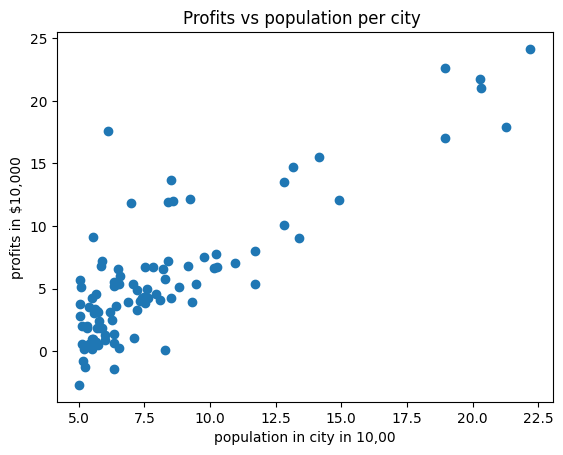

In [61]:
plt.scatter(x_train, y_train)
plt.title("Profits vs population per city ")
plt.xlabel("population in city in 10,00")
plt.ylabel("profits in $10,000")
plt.show()

In [67]:
def compute_cost(x,y,w,b):

    m = x.shape[0]

    f_wb_sum = 0.0
    cost = 0
    
    for i in range(m):
        f_wb_i = w*x[i] + b
        f_wb_sum = f_wb_sum + (f_wb_i - y[i])**2
    
    cost = (1/(2*m))*f_wb_sum

    return(cost)

In [74]:
def compute_gradient(x,y,w,b):

    m = x.shape[0]
    
    dj_dw_sum = 0.0
    dj_db_sum = 0.0


    for i in range(m):
        f_wb = w*x[i] + b

        dj_dw = (f_wb - y[i])*x[i]
        dj_dw_sum = dj_dw_sum + dj_dw

        dj_db = (f_wb - y[i])
        dj_db_sum = dj_db_sum + dj_db
    
    dj_dw = (1/m)*dj_dw_sum
    dj_db = (1/m)*dj_db_sum

    return dj_dw, dj_db

[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]
[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875
  

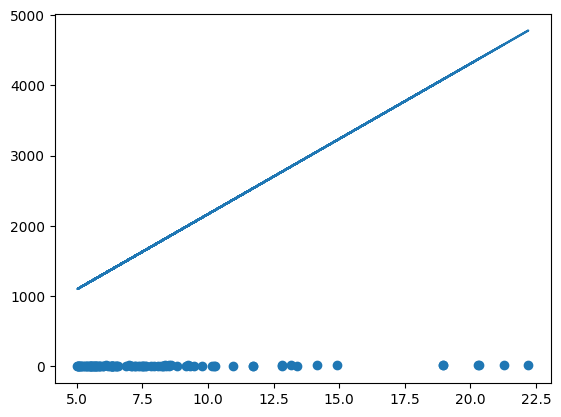

In [75]:
w_init = 3.203
b_init = 2.323

print(x_train)
print(y_train)

w ,b = compute_gradient(x_train, y_train, w_init, b_init)

print(f"w = {w}, b = {b}")

y_new = w*x_train + b

plt.scatter(x_train, y_train)
plt.plot(x_train, y_new)


In [81]:
def compute_gradient_descent(x, y, w, b, iterations, learning_rate, compute_gradient, compute_cost):

    cost_history = [0.0]*iterations
    w_compute = w
    b_compute = b

    if iterations < 100000:
        for i in range(iterations):
            w_cal, b_cal =  compute_gradient(x, y, w_compute, b_compute)
            
            w_compute = w_compute - learning_rate*w_cal
            b_compute = b_compute - learning_rate*b_cal

            cost_history[i] = compute_cost(x, y, w_compute, b_compute)

    return w_compute, b_compute, cost_history


w_linear_regresion: 1.1529826298431565, b_linear_regresion: -3.4971080060952624


<function matplotlib.pyplot.show(close=None, block=None)>

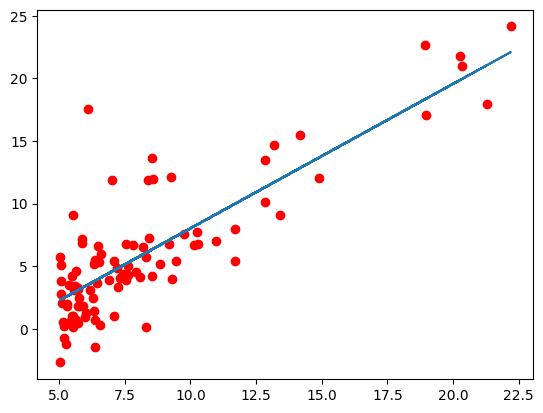

In [106]:

iteraciones = 15000
learn_rate = 0.001

w_linear_regresion, b_linear_regresion, cost_hist =  compute_gradient_descent(x_train, y_train, w_init, b_init, iteraciones, learn_rate, compute_gradient, compute_cost)

y_new = w_linear_regresion*x_train + b_linear_regresion

print(f"w_linear_regresion: {w_linear_regresion}, b_linear_regresion: {b_linear_regresion}")

plt.scatter(x_train, y_train, c='r')
plt.plot(x_train, y_new)
plt.show


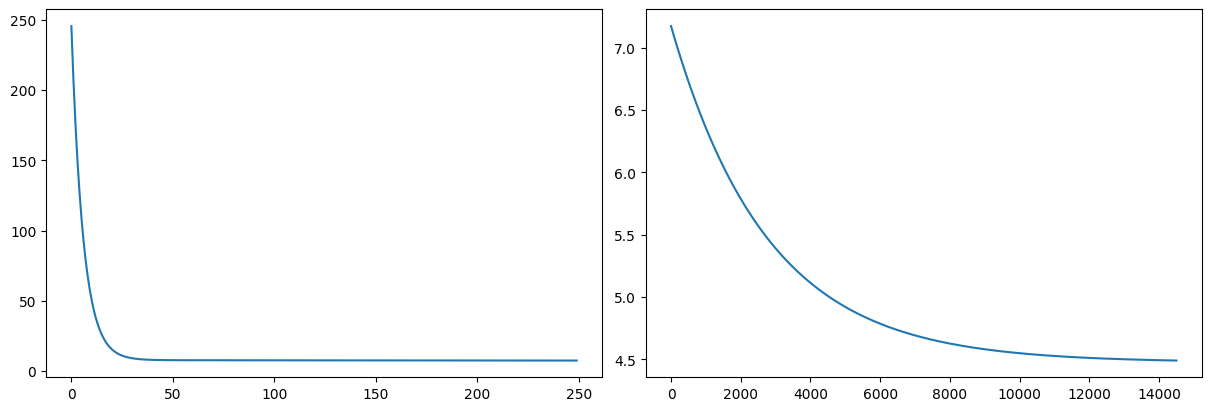

In [105]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout =True, figsize=(12, 4))
ax1.plot(cost_hist[:250])

ax2.plot(cost_hist[500:])
